In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import AdvancedBraggEdgeFitting_v2
from PIL import Image

import tifffile
from tifffile import TiffFile

from skimage import io

import os, fnmatch
from os import listdir

from TOF_routines import tof2l
from TOF_routines import find_nearest
%matplotlib notebook

In [2]:
pathdata = '/media/carminati_c/Data2/LSP_Manuel/sample_binned_spotCleaned/'
pathob = '/media/carminati_c/Data2/LSP_Manuel/OB_binned_spotCleaned/'
files_sample = (sorted(fnmatch.filter(listdir(pathdata),'*.tif')))
files_ob = (sorted(fnmatch.filter(listdir(pathob),'*.tif')))
spectrum = np.loadtxt('/media/ws_niag/10_people/Morgano/RADEN_data_analysis/TEST6_000_Spectra.txt', usecols=0)

In [3]:
spectrum_binned = spectrum[0::18]
print(len(spectrum_binned))

t0=-0.0002618673892937752 
L=18.961609065251505
mylambda_bin = tof2l(spectrum_binned, 0,t0,L)

156


In [4]:
(pathob+files_ob[0])

ob = io.imread(pathob+files_ob[0])
np.shape(ob)

ob_image = np.zeros([300,400,155])
sample_image = np.zeros([300,400,155])
np.shape(ob_image)

for i in range(0,155):
    ob_image[:,:,i] = io.imread(pathob+files_ob[i])
    sample_image[:,:,i] = io.imread(pathdata+files_sample[i])

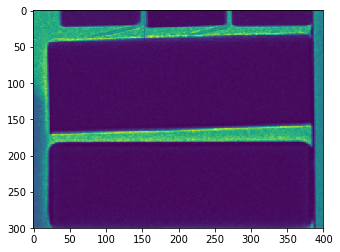

In [ ]:
plt.figure()
plt.imshow(sample_image[:,:,i]/ob_image[:,:,i])

trans_image = np.zeros([300,400,155])
for i in range(0,155):
    dose = np.median(ob_image[10:20,10:20,i])/np.median(sample_image[10:20,10:20,i])
    trans_image[:,:,i] = sample_image[:,:,i]/ob_image[:,:,i]*dose

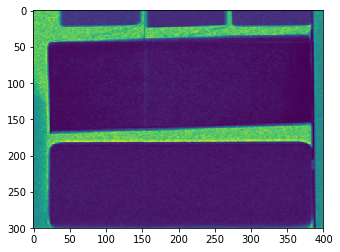

In [ ]:
plt.figure()
plt.imshow(trans_image[:,:,70])

In [ ]:
sp=np.zeros(156)
for i in range(0,155):
    sp[i] = np.median(trans_image[100:101,100:101,i])

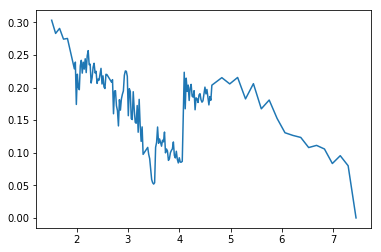

In [ ]:
plt.plot(mylambda_bin, sp)

[88, 125]
106
True
[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 8
    # data points      = 37
    # variables        = 7
    chi-square         = 0.00440020
    reduced chi-square = 1.4667e-04
    Akaike info crit   = -320.369849
    Bayesian info crit = -309.093424
[[Variables]]
    t0:                 4.07830107 +/-        nan (nan%) (init = 4.07799)
    alpha:              8.2829e-04 +/- 22761.8787 (2748060457.19%) (init = 0.001106167)
    sigma:              8.6303e-04 +/-        nan (nan%) (init = 0.0009570788)
    a1:                -0.19624676 +/- 0.76945177 (392.08%) (init = -0.09389062)
    a2:                 0.43692871 +/- 0.18156829 (41.56%) (init = 0.4130438)
    a5:                -0.42885621 +/- 1.22964217 (286.73%) (init = -0.5942876)
    a6:                 0.32228049 +/- 0.30775297 (95.49%) (init = 0.3627477)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are

/home/carminati_c/git/scripts/python/ToF_notebooks/AdvancedBraggEdgeFitting_v2.py:61: RuntimeWarning: invalid value encountered in multiply
  edge = 0.5*(term3(t,t0,sigma) - term4(t,t0,alpha,sigma)* term5(t,t0,alpha,sigma))
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:767: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:774: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


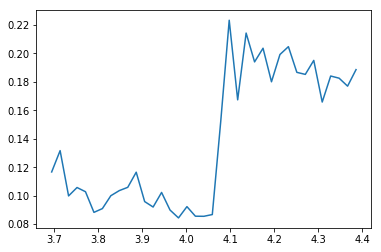

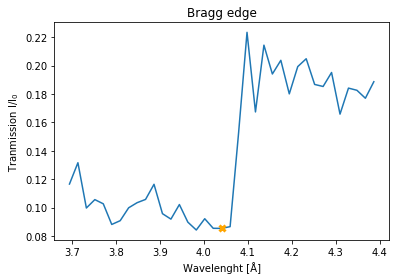

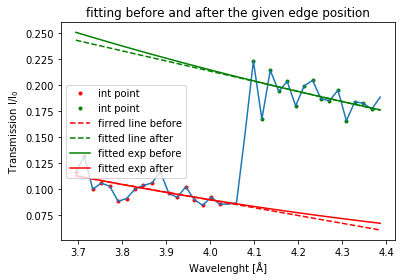

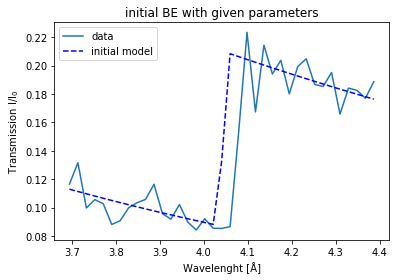

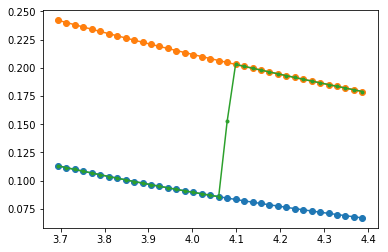

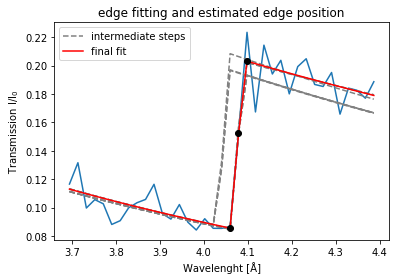

{'t0': 4.078301067385601,
 'sigma': 0.000863029861225606,
 'alpha': 0.0008282888638646131,
 'a1': -0.19624675766855218,
 'a2': 0.4369287136691108,
 'a5': -0.428856212813002,
 'a6': 0.32228048615134824,
 'final_result': <lmfit.model.ModelResult at 0x7f25641e83c8>,
 'fitted_data': array([0.11308054, 0.11144286, 0.10982715, 0.10823487, 0.10666737,
        0.1051209 , 0.10359849, 0.10209651, 0.10061631, 0.09915914,
        0.09772153, 0.09630628, 0.09491003, 0.09353402, 0.09217941,
        0.09084299, 0.08952736, 0.08822939, 0.08695024, 0.08569098,
        0.15241595, 0.20304577, 0.20134636, 0.19966118, 0.19799191,
        0.19633481, 0.19469335, 0.19306385, 0.19144799, 0.18984739,
        0.18825845, 0.18668451, 0.18512204, 0.18357265, 0.18203789,
        0.18051431, 0.17900512]),
 'pos_extrema': [19, 21],
 'height': 0.13669906693274844}

In [ ]:
myrange =[]
myrange.append(find_nearest(mylambda_bin, 3.7))
myrange.append(find_nearest(mylambda_bin, 4.4))
print(myrange)

plt.figure()
plt.plot(mylambda_bin[myrange[0]:myrange[1]], sp[myrange[0]:myrange[1]])

est_sigma = 0.001
est_alpha = 0.001
est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)

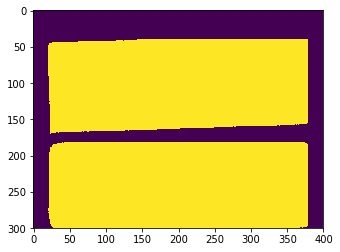

In [ ]:
mymask = trans_image[:,:,70]<0.5

mymask[:40,:] = False
mymask[:,380:] = False

plt.figure()
plt.imshow(mymask)

In [ ]:
%%time

est_sigma = 0.01
est_alpha = 0.01
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)
print(est_pos)
small_range = np.array([0, myrange[1]-myrange[0]-1])
small_lambda = mylambda_bin[myrange[0]:myrange[1]]
print(small_range)


AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp[myrange[0]:myrange[1]], small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

edge_position = np.zeros(np.shape(mymask))
edge_width = np.zeros(np.shape(mymask))
print(np.shape(edge_position))

for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (mymask[i,j]):
#             print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                edge_position[i,j] = edge_fit['t0']
                if (len(edge_fit['pos_extrema'])==2):
                    edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
                else:
                    edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                edge_position[i,j]= -2.0
                edge_width[i,j]=-2.0
                

                    


    

18
[ 0 36]
True
(300, 400)
True
True
True
True
True
True
True
True
True
True
True
Unexpected error at : 40 154
True
True


/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:501: RuntimeWarning: invalid value encountered in less
  mask = (g < 0) & np.isfinite(ub)
/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:505: RuntimeWarning: invalid value encountered in greater
  mask = (g > 0) & np.isfinite(lb)
/home/carminati_c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Unexpected error at : 40 207
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Unexpected error at : 40 222
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Unexpected error at : 40 248
True
True
Unexpected error at : 40 250
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True

In [ ]:
plt.figure()
plt.show(edge_position)
np.save(edge_position, edge_position)